## draw image

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def draw_img(img):
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 2)

    # show in image axis
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"image axis")
    ax.imshow(img, cmap="gray")

    # show in x y axis
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"x y axis")
    ax.imshow(img, cmap="gray")
    ax.set_xlim(0, img.shape[1])
    ax.set_ylim(0, img.shape[0])

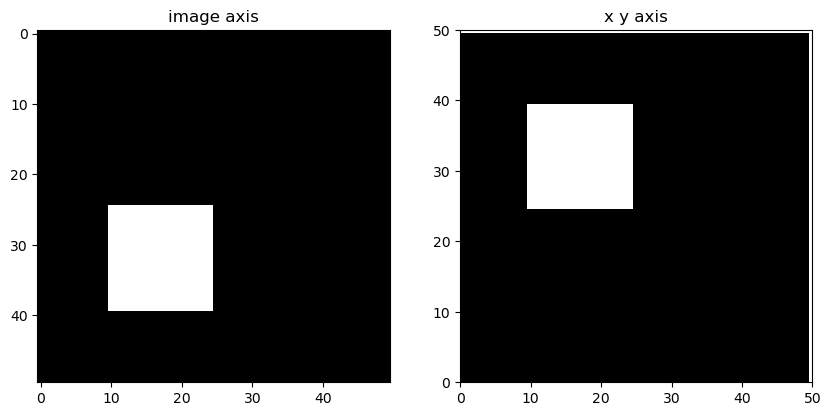

In [3]:
img = np.zeros((50, 50))

img[25:40, 10:25] = 255
draw_img(img)

## draw radon

In [4]:
from skimage.transform import radon
from numpy import mean

def draw_radon(name, img):
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(name)
    gs = fig.add_gridspec(1, 4)

    diagonal = np.sqrt(2) * max(img.shape)
    radius = diagonal // 2 + 1
    y_half = img.shape[0] / 2
    x_half = img.shape[1] / 2

    ax = fig.add_subplot(gs[0, 0])
    ax.set_title("x y axis")
    ax.set_xlabel("x - axis")
    ax.set_ylabel("y - axis")
    ax.set_xlim(0, diagonal)
    ax.set_ylim(0, diagonal)
    ax.imshow(img, cmap="gray", extent=[radius - x_half, radius + x_half, radius + y_half, radius - y_half])
    ax.plot(radius, radius, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(radius + 20, radius, marker=r'$\Updownarrow$', ms=50)

    ax = fig.add_subplot(gs[0, 2])
    ax.set_title("y x axis")
    ax.set_xlabel("y - axis")
    ax.set_ylabel("x - axis")
    ax.set_xlim(0, diagonal)
    ax.set_ylim(0, diagonal)
    ax.imshow(img.T, cmap="gray", extent=[radius - y_half, radius + y_half, radius + x_half, radius - x_half])
    ax.plot(radius, radius, marker=r'$\circlearrowright$', ms=50)
    ax.plot(radius + 20, radius, marker=r'$\Leftrightarrow$', ms=50)

    I = img - mean(img)
    sinogram = radon(I, circle=False)

    ax = fig.add_subplot(gs[0, 1])
    ax.set_title("radon space: densities")
    ax.set_xlabel("x - axis")
    ax.set_ylabel("degrees")
    ax.imshow(sinogram.T, cmap="gray", aspect='auto')

    ax = fig.add_subplot(gs[0, 3])
    ax.set_title("radon space: densities")
    ax.set_xlabel("degrees")
    ax.set_ylabel("x - axis")
    ax.set_ylim(0, diagonal)
    ax.imshow(sinogram, cmap="gray", aspect='auto')


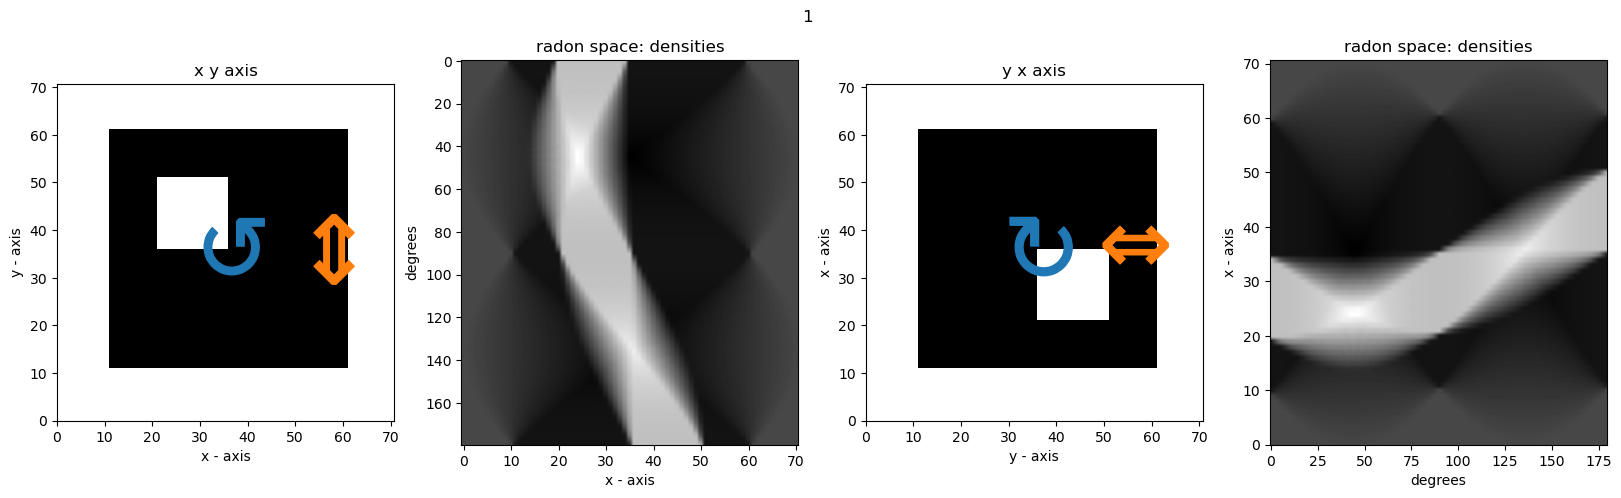

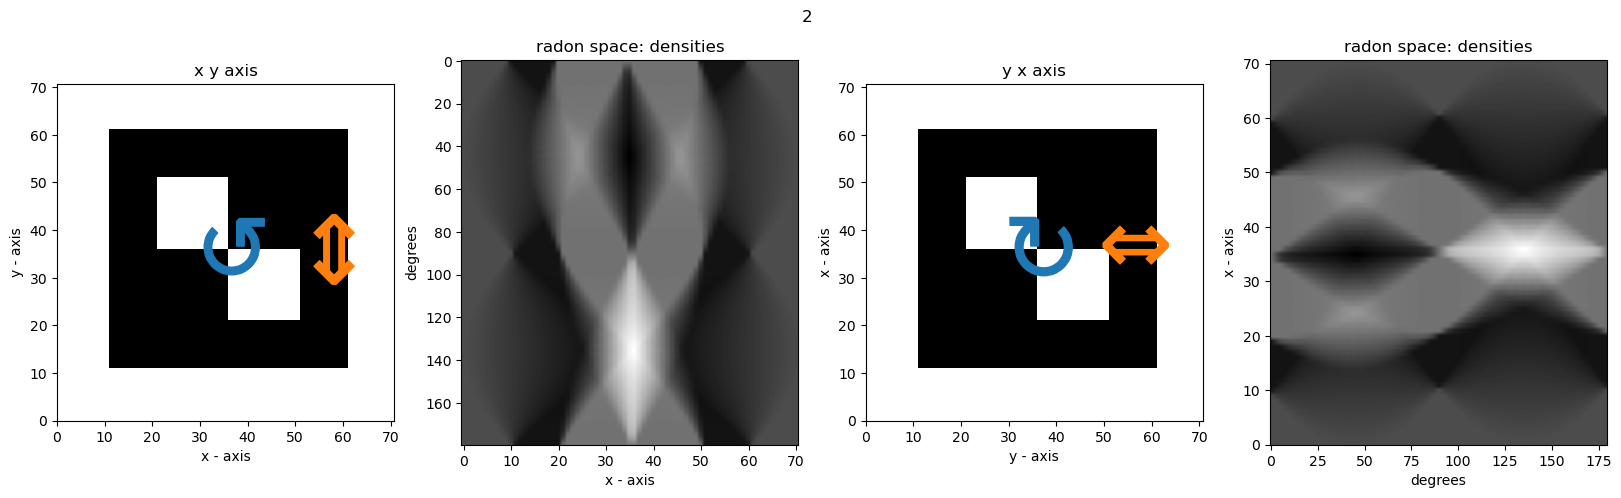

In [5]:
# image with empty
img = np.zeros((50, 50))

img[25:40, 10:25] = 255
draw_radon("1", img)

img[10:25, 25:40] = 255
draw_radon("2", img)
